In [1]:
# 1. Dataset manipulation
import pandas as pd
from pandas import DataFrame
import numpy as np

# 2. Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# 3. Shuffling the data
import random
# 4. Scaling the data
from sklearn.preprocessing import StandardScaler
# 5. train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# 6. Machine learning model
# 1) Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
# 2) Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# 3) Random Forest
from sklearn.ensemble import RandomForestClassifier
# 4) Naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# 5) K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
# 6) Neural Network
from sklearn.neural_network import MLPClassifier

# 7) Support Vector Machine (SVM) Algorithm
from sklearn.svm import SVC
# 8) XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 10) Stacking

# 7. test model
from sklearn import metrics

# 8. Evaluation
# 1) Accuracy score
from sklearn.metrics import accuracy_score
# 1) confusion_matrix
from sklearn.metrics import confusion_matrix
# 2) Classification_report
from sklearn.metrics import classification_report
# 3) ROC - AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings


<font color=black size=5 >5. Model Comparison<br/>     

<font color=black size=4> **5.1 Feature Sets Preparation**

In [2]:
df = pd.read_csv("0708df_sample.dat")
# leave 20% of data out for testing
X = df.drop('activityID',axis=1)
y = df['activityID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [4]:
X_train

,heart rate,h_temp,h_acc_16X,h_acc_16Y,h_acc_16Z,h_acc_ma,h_gyroX,h_gyroY,h_gyroZ,h_gyro_ma,...,a_acc_16Y,a_acc_16Z,a_acc_ma,a_gyro_ma,a_gyroX,a_gyroY,a_gyroZ,a_magY,a_magZ,a_mag_ma
976,-0.8926,1.07400,-0.6514,-0.0240,0.109250,-0.2720,-0.04000,-0.05948,0.02747,-0.9863,...,-0.1870,-0.3481,-0.3420,-0.7940,0.015590,-0.04580,-0.03870,-0.4550,0.9620,-0.7817
4567,-1.4940,0.85550,0.9204,0.7340,0.843800,-0.2585,-0.02426,-0.06970,-0.00082,-1.0070,...,-1.6860,-0.5215,-0.3018,-0.7940,0.029950,-0.04288,-0.03250,1.1720,-1.0810,-1.0690
1388,-0.4922,0.04462,0.8360,1.0940,-0.971000,-0.3518,-0.34130,0.21300,-0.04395,-0.7153,...,-0.2832,0.6820,-0.3926,-0.7817,-0.008070,0.03595,-0.04105,1.5190,-3.6720,1.9795
431,-0.9260,0.85550,0.1521,-1.4795,1.688000,0.3830,-0.17090,-0.46880,-0.45800,-0.4807,...,0.2627,-0.3408,-0.3777,-0.7590,-0.027240,0.01531,0.00448,-0.8726,-0.9023,-0.1815
2251,0.5430,0.29420,-0.2950,0.2087,0.462200,-0.4297,-1.82600,2.05900,0.63400,0.9873,...,1.7500,0.9614,1.5980,2.4960,-1.237000,-2.02100,2.82000,0.0940,-1.6140,-1.3870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,-0.1583,0.82400,-1.6750,1.1840,0.000753,2.0530,-1.72900,-0.51170,-2.26600,1.6820,...,-1.2800,0.2449,-0.6490,0.4912,-2.309000,-0.53500,0.07970,-0.8154,0.6455,-0.0648
1813,1.6780,0.38800,-2.1880,3.2010,0.612000,5.0600,-1.38600,1.41600,2.76400,2.1560,...,1.4560,-1.0970,0.7550,0.4734,-0.254400,-0.56500,-1.17000,0.3496,0.5874,0.1265
3902,0.9100,-0.39230,-3.5620,1.3950,1.213000,5.2270,-0.59100,-0.45040,-1.57200,0.6790,...,2.0370,1.9730,2.4040,0.9130,1.025000,0.99700,-1.46900,1.8790,-0.1241,0.9320
366,-0.2585,0.76200,0.3215,-0.8480,1.303000,-0.4717,-0.91260,1.57500,-0.16100,0.1998,...,0.2224,-0.6543,-0.3762,-0.5874,0.001818,-0.08093,0.16520,-0.5913,-0.3710,-1.8260


In [3]:
# Feature with only heart rate
heart=['heart rate']

# Feature with only temperature
temp=['h_temp', 'a_temp']
# Feature with heart rate and hand  temperature
heart_h = ['heart rate', 'h_temp']
# Feature with heart rate and ankle  temperature
heart_a = ['heart rate', 'a_temp']

# K Nearest Neighbor and Decision trees have 3 same features
fea_knn=['heart rate', 'h_temp', 'a_temp']


# Random forest 5 features
fea_rf= ['heart rate', 'h_temp', 'a_temp', 'c_mag_ma', 'c_acc_16Z']

# Support Vector Machine 10 features
fea_svm=['heart rate','h_temp','h_magY','h_magZ', 'c_acc_16Z','c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma']

# Logistic regreesion 15 features
fea_lgr=(['heart rate','h_temp','h_gyro_ma','h_magX','h_magY','h_magZ','c_acc_16Z','c_gyro_ma','c_magX',
       'c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma','a_mag_ma'])



<font color=black size=4> **5.2 Compare Models with Different Festure Sets**

In [6]:
models = [
    ('Support Vector Machines', SVC(C=5,gamma=1, kernel='rbf')), 
     ('K Neaest Neighbors', KNeighborsClassifier(metric='manhattan', n_neighbors = 5, weights= 'distance')), 
      ('Logistic Regression', LogisticRegression(max_iter=2000,solver='saga', random_state=42,n_jobs=-1)),
       ('Decision Tree', DecisionTreeClassifier(min_samples_split=50, random_state=42)), 
        ('Random Forest', RandomForestClassifier(criterion='entropy', random_state=42, n_jobs=-1)),
         ('GradientBoosting',GradientBoostingClassifier(max_depth=2, n_estimators=100)),
          ('XGBoost', XGBClassifier(random_state=42)),
           ('Multilayer Perceptron', MLPClassifier(max_iter=2000)),
            ('Gaussian Naive Bayes',GaussianNB())
          ]
feature_sets = {
    'heart':heart,
    'temp':temp,
    'heart_h':heart_h,
    'heart_a': heart_a,
    'fea_knn': fea_knn,
    'fea_svm': fea_svm,
    'fea_rf': fea_rf,
    'fea_lgr': fea_lgr
}

results = {'Model': [], 'Feature Set': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Iterate over feature sets
for feature_set_name, feature_set in feature_sets.items():
    for model_name, model in models:
        # Select the features from X_train
        X_train_selected = X_train[feature_set]

        # Fit the model and calculate cross-validated train accuracy
        train_accuracy = cross_val_score(model, X_train_selected, y_train, cv=5).mean()

        # Fit the model on the full training set and predict on X_test
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test[feature_set])

        # Calculate test accuracy
        test_accuracy = accuracy_score(y_test, y_pred)

        results['Model'].append(model_name)
        results['Feature Set'].append(feature_set_name)
        results['Train Accuracy'].append(train_accuracy)
        results['Test Accuracy'].append(test_accuracy)

# Create dataframes for train and test accuracy results
train_accuracy_df = pd.DataFrame(results).pivot(index='Feature Set', columns='Model', values='Train Accuracy')
test_accuracy_df = pd.DataFrame(results).pivot(index='Feature Set', columns='Model', values='Test Accuracy')

In [7]:
train_accuracy_df = train_accuracy_df.reset_index()
test_accuracy_df = test_accuracy_df.reset_index()

In [8]:
train_accuracy_df 

Model,Feature Set,Decision Tree,Gaussian Naive Bayes,GradientBoosting,K Neaest Neighbors,Logistic Regression,Multilayer Perceptron,Random Forest,Support Vector Machines,XGBoost
0,fea_knn,0.87075,0.40575,0.95050,0.96450,0.49175,0.92225,0.96925,0.87975,0.96950
1,fea_lgr,0.83525,0.75075,0.96525,0.92400,0.78200,0.92525,0.97450,0.83550,0.98100
2,fea_rf,0.85825,0.55925,0.95625,0.91975,0.63000,0.93100,0.98250,0.90400,0.97975
3,fea_svm,0.83550,0.66775,0.96325,0.91175,0.72350,0.92350,0.97800,0.89375,0.97950
4,heart,0.40900,0.30900,0.41425,0.36200,0.29025,0.37900,0.40800,0.36425,0.41025
5,heart_a,0.76400,0.42750,0.79350,0.82950,0.41300,0.73775,0.83575,0.66900,0.83925
6,heart_h,0.80000,0.43050,0.83425,0.86250,0.44650,0.70550,0.88100,0.64350,0.88750
7,temp,0.84675,0.18550,0.89000,0.91450,0.23300,0.82100,0.92550,0.73525,0.92475


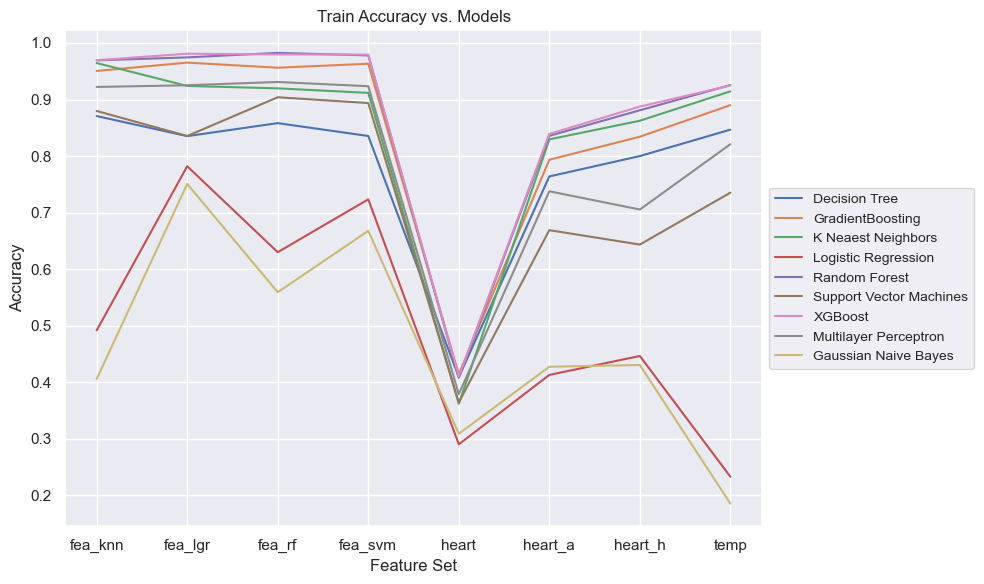

In [9]:
x = train_accuracy_df['Feature Set']
models_to_plot = ['Decision Tree', 'GradientBoosting', 'K Neaest Neighbors', 'Logistic Regression',
                  'Random Forest', 'Support Vector Machines', 'XGBoost', 
                  'Multilayer Perceptron', 'Gaussian Naive Bayes']

fig, ax = plt.subplots(figsize=(10, 6))

for model in models_to_plot:
    ax.plot(x, train_accuracy_df[model], label=model)

ax.set_xlabel('Feature Set')
ax.set_ylabel('Accuracy')
ax.set_title('Train Accuracy vs. Models')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
# Feature with only heart rate
heart=['heart rate']

# Feature with only temperature
temp=['h_temp', 'a_temp']
# Feature with heart rate and hand  temperature
heart_h = ['heart rate', 'h_temp']
# Feature with heart rate and ankle  temperature
heart_a = ['heart rate', 'a_temp']

# K Nearest Neighbor and Decision trees have 3 same features
fea_knn=['heart rate', 'h_temp', 'a_temp']

# Random forest 5 features
fea_rf= ['heart rate', 'h_temp', 'a_temp', 'c_mag_ma', 'c_acc_16Z']

# Support Vector Machine 10 features
fea_svm=['heart rate','h_temp','h_magY','h_magZ', 'c_acc_16Z','c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma']

# Logistic regreesion 15 features
fea_lgr=(['heart rate','h_temp','h_gyro_ma','h_magX','h_magY','h_magZ','c_acc_16Z','c_gyro_ma','c_magX',
       'c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma','a_mag_ma'])



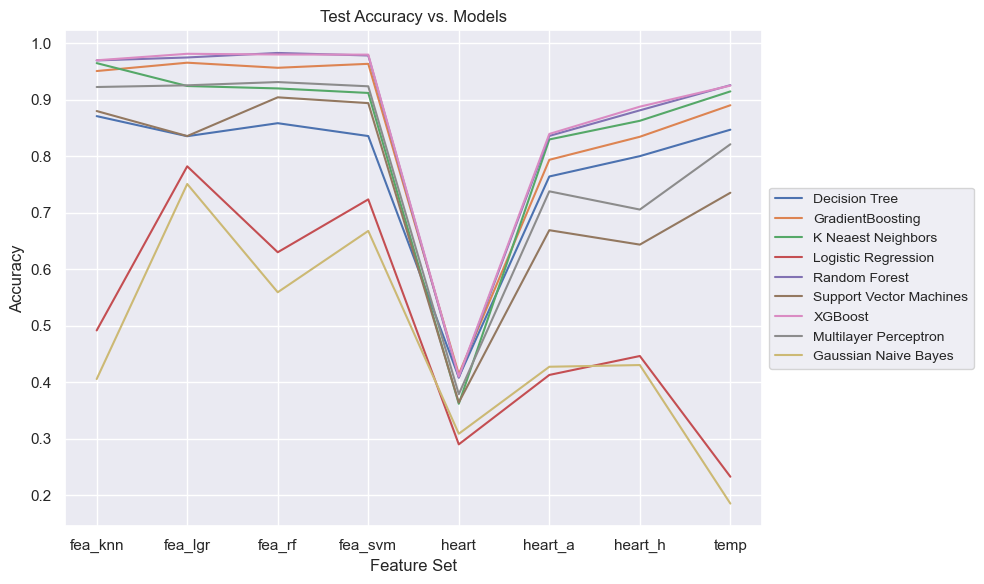

In [10]:
x = test_accuracy_df['Feature Set']
models_to_plot = ['Decision Tree', 'GradientBoosting', 'K Neaest Neighbors', 'Logistic Regression',
                  'Random Forest', 'Support Vector Machines', 'XGBoost', 
                  'Multilayer Perceptron', 'Gaussian Naive Bayes']

fig, ax = plt.subplots(figsize=(10, 6))

for model in models_to_plot:
    ax.plot(x, train_accuracy_df[model], label=model)

ax.set_xlabel('Feature Set')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy vs. Models')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})

plt.tight_layout()
plt.show()

<font color=black size=4 > **5.3 Build Models for Selected Features**<br/>
    
<font color=black size=3 >**1. Model_1 Features only from Temperature**<br/>


<font color=black size=3 > **1) Create Training and Test Data**<br/>

In [6]:
X_test1 = X_test[temp]
X_train1 = X_train[temp]

<font color=black size=3 > **1) Hyperparameter Tuning**<br/>

In [7]:
from sklearn.model_selection import GridSearchCV
import numpy as np
warnings.filterwarnings('ignore')

# Define the models
models = {
    'Support Vector Machines': SVC(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Multilayer Perceptron': MLPClassifier()
}

# Define the parameter grids for hyperparameter tuning
param_grids = {
    'Decision Tree': {'criterion': ['entropy'], 'splitter': ['best'],
                      'max_depth': list(range(1, 50, 5)),
                      'min_samples_split': [10,  50, 100, 180],
                      'min_samples_leaf': [10, 20, 30]},
    
    'K Nearest Neighbors': {'n_neighbors': list(range(1, 80)), 'weights': ['distance'],
                            'metric': ['manhattan']},
    
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                          'min_samples_split': [10, 20, 30], 'min_samples_leaf': [5, 10, 15],
                          'subsample': [0.8, 1.0]},
    
    'Random Forest': {'n_estimators': [100, 300, 500, 700], 'criterion': ['entropy'],
                      'max_depth': list(range(1, 50, 5)), 'min_samples_split': [10, 20, 30],
                      'min_samples_leaf': [5, 10, 15]},
    
    'Support Vector Machines': {'C': [0.1, 1], 'kernel': ['linear', 'poly', 'rbf'],
                                'gamma': [0.1, 1], 'degree': [2, 3]},

    'XGBoost': {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 1, 1.5, 2]},
    
    'Multilayer Perceptron': {'hidden_layer_sizes': [(100,), (50, 50)], 'activation':['identity', 'logistic', 'tanh','relu'],
                              'solver': ['sgd'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                              'alpha': [0.1, 1, 0.001], 'learning_rate_init': [0.001, 0.01]}
}


results_hyt = pd.DataFrame(columns=['Model', 'Best Parameters', 'Cross-validated Accuracy'])
for model_name, model in models.items():
    
    print(f"Model: {model_name}")
    param_grid = param_grids[model_name]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train1, y_train)

    # Store the best hyperparameters and cross-validated accuracy in the results DataFrame
    results_hyt = results_hyt.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Cross-validated Accuracy': grid_search.best_score_
    }, ignore_index=True)


    print("Best Hyperparameters:", grid_search.best_params_)
    print("Cross-validated Accuracy:", grid_search.best_score_)
    print()

Model: Support Vector Machines
Best Hyperparameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Cross-validated Accuracy: 0.6085

Model: K Nearest Neighbors
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
Cross-validated Accuracy: 0.92275

Model: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
Cross-validated Accuracy: 0.8775000000000001

Model: Random Forest
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 700}
Cross-validated Accuracy: 0.917

Model: Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Cross-validated Accuracy: 0.9247500000000001

Model: XGBoost
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_dept

In [12]:
results_hyt

,Model,Best Parameters,Cross-validated Accuracy
0,Support Vector Machines,"{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'r...",0.60850
1,K Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 23, 'we...",0.92275
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 16, 'min...",0.87750
3,Random Forest,"{'criterion': 'entropy', 'max_depth': 41, 'min...",0.91700
4,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.92500
5,XGBoost,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",0.92350
6,Multilayer Perceptron,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.75150


<font color=black size=3 > **2) Model Evaluation**<br/>

In [18]:
models_hyt = {
    'Support Vector Machines': SVC(C = 1, gamma =1, kernel = 'rbf'),
    'K Nearest Neighbors': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 23, weights= 'distance'),

    'Decision Tree': DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, min_samples_leaf= 10,
                                            min_samples_split= 10, splitter='best'),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 41, min_samples_leaf= 5, 
                                            min_samples_split= 10, n_estimators= 300),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, 
                                                    min_samples_leaf= 5, min_samples_split=20, 
                                                    n_estimators= 100, subsample = 0.8),
    'XGBoost': XGBClassifier(colsample_bytree=1, gamma= 0, learning_rate=0.1, max_depth=7, 
                             min_child_weight= 1, subsample = 1.0),
    'Multilayer Perceptron': MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.1, hidden_layer_sizes= (50, 50), 
                                           learning_rate ='adaptive', learning_rate_init = 0.1, solver='sgd')
}

results_model1 = {}


for model_name, model in models_hyt.items():
    model.fit(X_train1, y_train)
    
    # Cross-validated training accuracy
    training_accuracy = cross_val_score(model, X_train1, y_train, cv=5)
    results_model1[model_name] = {
        'min_score': np.min(training_accuracy),
        'max_score': np.max(training_accuracy),
        'mean_score': np.mean(training_accuracy),
        'std_dev': np.std(training_accuracy)
    }
    
    # Test accuracy
    test_accuracy = model.score(X_test1, y_test)
    results_model1[model_name]['test_accuracy'] = test_accuracy

# Print the results
print("Model\t\t\tTraining Accuracy\tTest Accuracy")
print("-------------------------------------------------")

for model_name, scores in results_model1.items():
    print(f"{model_name:<24}{scores['mean_score']:.4f} ± {scores['std_dev']:.4f}\t{scores['test_accuracy']:.4f}")


Model			Training Accuracy	Test Accuracy
-------------------------------------------------
Support Vector Machines 0.6085 ± 0.0120	0.6440
K Nearest Neighbors     0.9227 ± 0.0083	0.9200
Decision Tree           0.8775 ± 0.0087	0.8980
Random Forest           0.9158 ± 0.0085	0.9160
Gradient Boosting       0.9210 ± 0.0083	0.9270
XGBoost                 0.9235 ± 0.0089	0.9230
Multilayer Perceptron   0.9100 ± 0.0127	0.9170


In [79]:
results_model1= pd.DataFrame(results_model1).transpose()
results_model1

,min_score,max_score,mean_score,std_dev,test_accuracy
Support Vector Machines,0.60000,0.63125,0.60850,0.011974,0.644
K Nearest Neighbors,0.90750,0.93125,0.92275,0.008344,0.920
Decision Tree,0.86750,0.89375,0.87750,0.008732,0.898
Random Forest,0.90375,0.92875,0.91575,0.008537,0.916
Gradient Boosting,0.90750,0.93125,0.92100,0.008307,0.927
XGBoost,0.90875,0.93250,0.92350,0.008853,0.923
Multilayer Perceptron,0.88625,0.92125,0.91000,0.012698,0.917


In [80]:
results_model1.to_csv('0721results_temp.csv', index=True)

<font color=black size=3 > **3) Check Learning Curve**<br/>

In [8]:
X1 = X[temp]

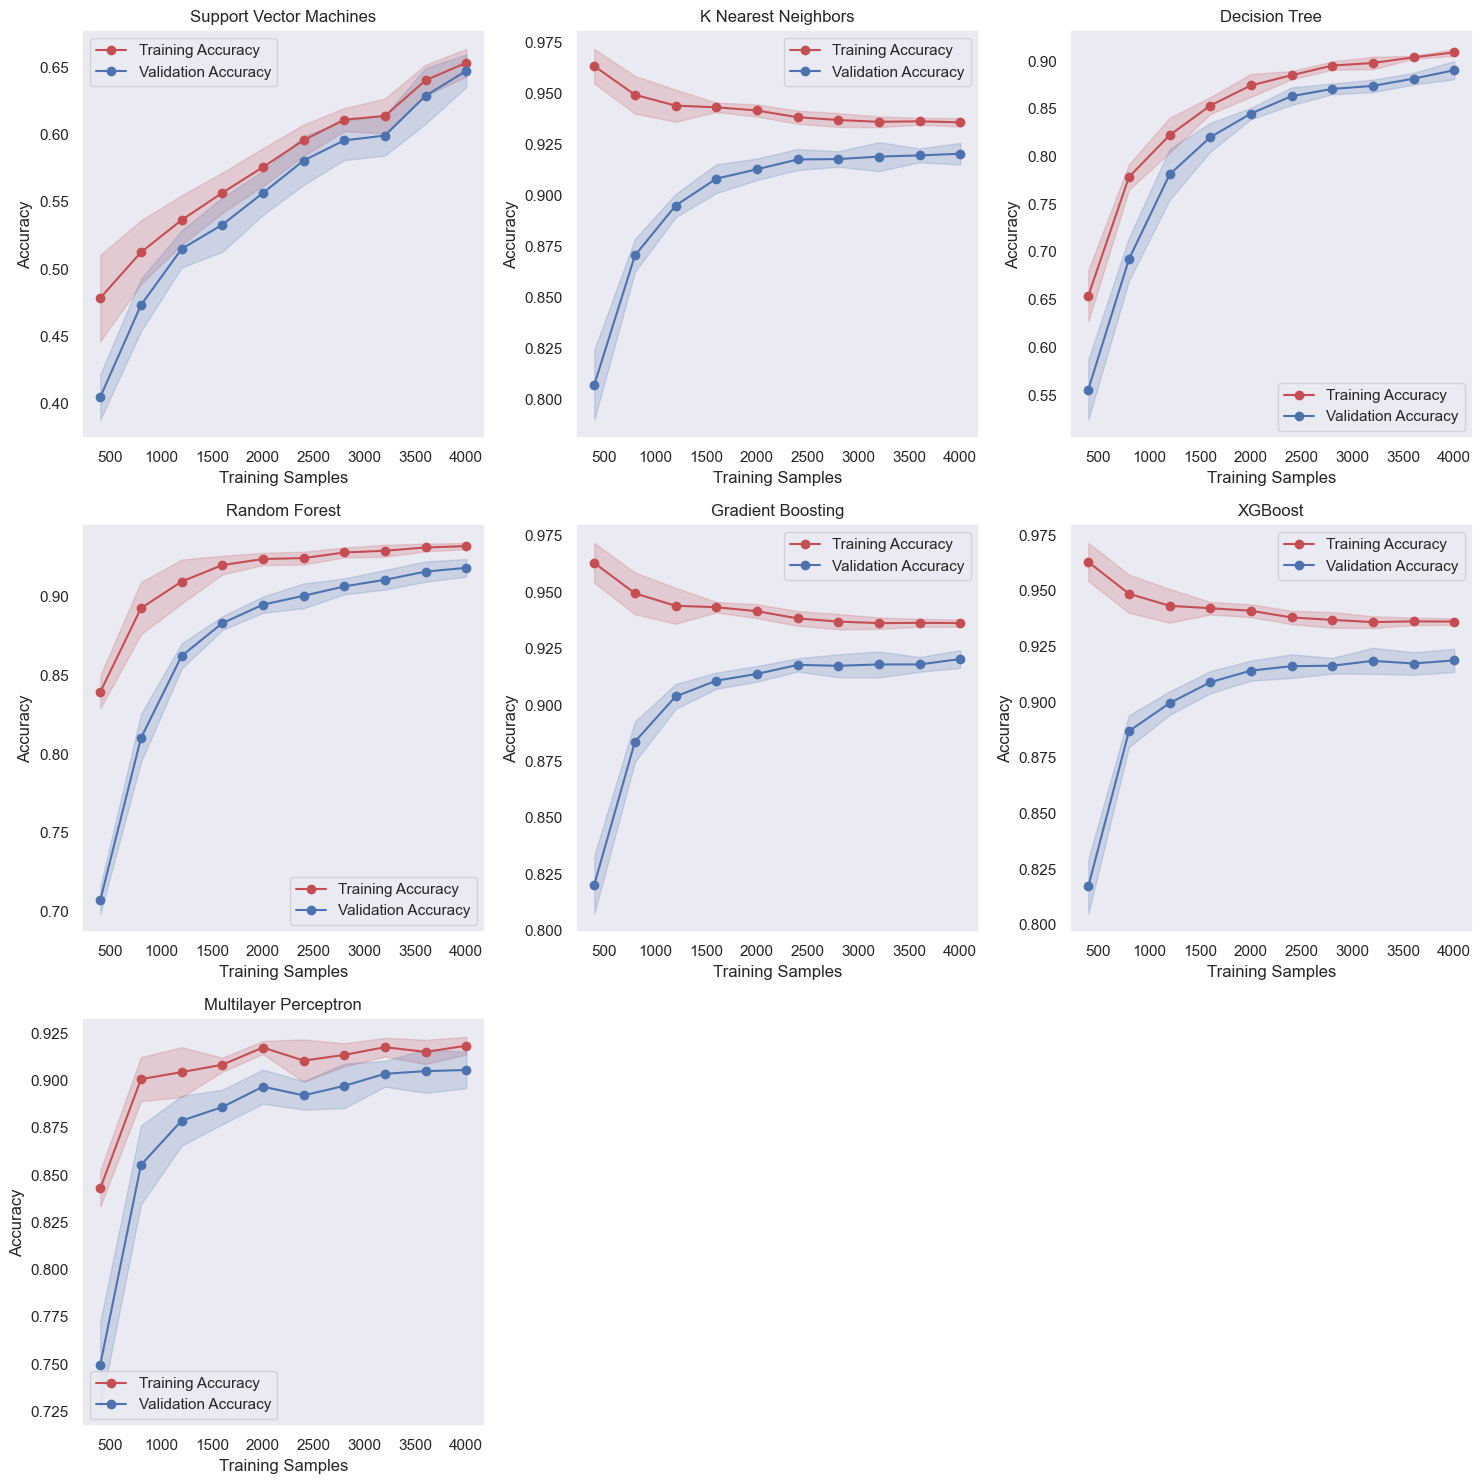

In [10]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

warnings.filterwarnings('ignore')
models_hyt = {
    'Support Vector Machines': SVC(C = 1, gamma =1, kernel = 'rbf'),
    'K Nearest Neighbors': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 23, weights= 'distance'),

    'Decision Tree': DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, min_samples_leaf= 10,
                                            min_samples_split= 10, splitter='best'),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 41, min_samples_leaf= 5, 
                                            min_samples_split= 10, n_estimators= 300),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, 
                                                    min_samples_leaf= 5, min_samples_split=20, 
                                                    n_estimators= 100, subsample = 0.8),
    'XGBoost': XGBClassifier(colsample_bytree=1, gamma= 0, learning_rate=0.1, max_depth=7, 
                             min_child_weight= 1, subsample = 1.0),
    'Multilayer Perceptron': MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.1, hidden_layer_sizes= (50, 50), 
                                           learning_rate ='adaptive', learning_rate_init = 0.1, solver='sgd')
}

# Function to plot learning curves for a given model
def plot_learning_curve(model, model_name, subplot_position):
    plt.subplot(3, 3, subplot_position)
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X1, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2, color='r')

    plt.plot(train_sizes, val_mean, 'o-', color='b', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.2, color='b')

    plt.title(model_name)
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()

plt.figure(figsize=(15, 15))
position = 1

# Plot learning curves for each model
for model_name, model in models_hyt.items():
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(model, model_name, position)
    position += 1
plt.tight_layout()
plt.show()

    
<font color=black size=3 >**2. Model_2 Features of fea_knn**<br/>

In [11]:
X_test2 = X_test[fea_knn]
X_train2 = X_train[fea_knn]

<font color=black size=3 > **1) Hyperparameter Tuning**<br/>

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np
warnings.filterwarnings('ignore')
models = {
    'Support Vector Machines': SVC(),
    'K Nearest Neighbors': KNeighborsClassifier(),
#     'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Multilayer Perceptron': MLPClassifier()
}

# Define the parameter grids for hyperparameter tuning
param_grids = {
    'Decision Tree': {'criterion': ['entropy'], 'splitter': ['best'],
                      'max_depth': list(range(1, 50, 5)),
                      'min_samples_split': [10,  50, 100, 180],
                      'min_samples_leaf': [10, 20, 30]},
    
    'K Nearest Neighbors': {'n_neighbors': list(range(1, 80)), 'weights': ['distance'],
                            'metric': ['manhattan']},
    
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                          'min_samples_split': [10, 20, 30], 'min_samples_leaf': [5, 10, 15],
                          'subsample': [0.8, 1.0]},
    
    'Random Forest': {'n_estimators': [100, 300, 500, 700], 'criterion': ['entropy'],
                      'max_depth': list(range(1, 50, 5)), 'min_samples_split': [10, 20, 30],
                      'min_samples_leaf': [5, 10, 15]},
    
    'Support Vector Machines': {'C': [0.1, 1], 'kernel': ['linear', 'poly', 'rbf'],
                                'gamma': [0.1, 1], 'degree': [2, 3]},

#     'Logistic Regression': {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20),
#                             'solver': ['saga'], 'max_iter': [2500]},

    'XGBoost': {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 1, 1.5, 2]},
    
    'Multilayer Perceptron': {'hidden_layer_sizes': [(100,), (50, 50)], 'activation':['identity', 'logistic', 'tanh','relu'],
                              'solver': ['sgd'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                              'alpha': [0.1, 1, 0.001], 'learning_rate_init': [0.001, 0.01]}
}


results_fknn = pd.DataFrame(columns=['Model', 'Best Parameters', 'Cross-validated Accuracy'])
for model_name, model in models.items():
    
    print(f"Model: {model_name}")
    param_grid = param_grids[model_name]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train2, y_train)

    # Store the best hyperparameters and cross-validated accuracy in the results DataFrame
    results_fknn = results_fknn.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Cross-validated Accuracy': grid_search.best_score_
    }, ignore_index=True)


    print("Best Hyperparameters:", grid_search.best_params_)
    print("Cross-validated Accuracy:", grid_search.best_score_)
    print()

Model: Support Vector Machines
Best Hyperparameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Cross-validated Accuracy: 0.8049999999999999

Model: K Nearest Neighbors
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}
Cross-validated Accuracy: 0.966

Model: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
Cross-validated Accuracy: 0.8995

Model: Random Forest
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
Cross-validated Accuracy: 0.967

Model: Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 50, 'subsample': 0.8}
Cross-validated Accuracy: 0.9720000000000001

Model: XGBoost
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth

In [13]:
results_fknn

,Model,Best Parameters,Cross-validated Accuracy
0,Support Vector Machines,"{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'r...",0.80500
1,K Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.96600
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 16, 'min...",0.89950
3,Random Forest,"{'criterion': 'entropy', 'max_depth': 41, 'min...",0.96625
4,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.97200
5,XGBoost,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.97000
6,Multilayer Perceptron,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.84925


<font color=black size=3 > **2) Model Evaluation**<br/>

In [71]:
models_fknn = {
    'Support Vector Machines': SVC(C = 1, gamma = 1, kernel = 'rbf'),
    'K Nearest Neighbors': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'distance'),

    'Decision Tree': DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, min_samples_leaf= 10,
                                            min_samples_split= 10, splitter='best'),
    
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 41, min_samples_leaf= 5, 
                                            min_samples_split= 10, n_estimators= 100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, 
                                                    min_samples_leaf= 15, min_samples_split=20, 
                                                    n_estimators= 50, subsample = 0.8),
    'XGBoost': XGBClassifier(colsample_bytree=0.8, gamma= 0.1, learning_rate=0.1, max_depth=5, 
                             min_child_weight= 1, subsample = 1.0),
    'Multilayer Perceptron': MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.1, hidden_layer_sizes= (50, 50), 
                                           learning_rate ='adaptive', learning_rate_init = 0.1, solver='sgd')
}

results_model2 = {}


for model_name, model in models_fknn.items():
    model.fit(X_train2, y_train)
    
    # Cross-validated training accuracy
    training_accuracy = cross_val_score(model, X_train2, y_train, cv=5)
    results_model2[model_name] = {
        'min_score': np.min(training_accuracy),
        'max_score': np.max(training_accuracy),
        'mean_score': np.mean(training_accuracy),
        'std_dev': np.std(training_accuracy)
    }
    
    # Test accuracy
    test_accuracy = model.score(X_test2, y_test)
    results_model2[model_name]['test_accuracy'] = test_accuracy

# Print the results
print("Model\t\t\tTraining Accuracy\tTest Accuracy")
print("-------------------------------------------------")

for model_name, scores in results_model2.items():
    print(f"{model_name:<24}{scores['mean_score']:.4f} ± {scores['std_dev']:.4f}\t{scores['test_accuracy']:.4f}")


Model			Training Accuracy	Test Accuracy
-------------------------------------------------
Support Vector Machines 0.8050 ± 0.0099	0.8050
K Nearest Neighbors     0.9660 ± 0.0051	0.9670
Decision Tree           0.8992 ± 0.0094	0.9100
Random Forest           0.9650 ± 0.0054	0.9630
Gradient Boosting       0.9700 ± 0.0029	0.9740
XGBoost                 0.9700 ± 0.0041	0.9690
Multilayer Perceptron   0.9545 ± 0.0055	0.9610


In [74]:
results_model2= pd.DataFrame(results_model2).transpose()
results_model2

,min_score,max_score,mean_score,std_dev,test_accuracy
Support Vector Machines,0.79000,0.81875,0.80500,0.009937,0.805
K Nearest Neighbors,0.95750,0.97250,0.96600,0.005087,0.967
Decision Tree,0.89000,0.91625,0.89925,0.009441,0.910
Random Forest,0.96000,0.97500,0.96500,0.005420,0.963
Gradient Boosting,0.96500,0.97375,0.97000,0.002850,0.974
XGBoost,0.96625,0.97500,0.97000,0.004108,0.969
Multilayer Perceptron,0.94625,0.96250,0.95450,0.005511,0.961


In [75]:
results_model2.to_csv('0721results_fknn.csv', index=True)

<font color=black size=3 > **3) Check Learning Curve**<br/>

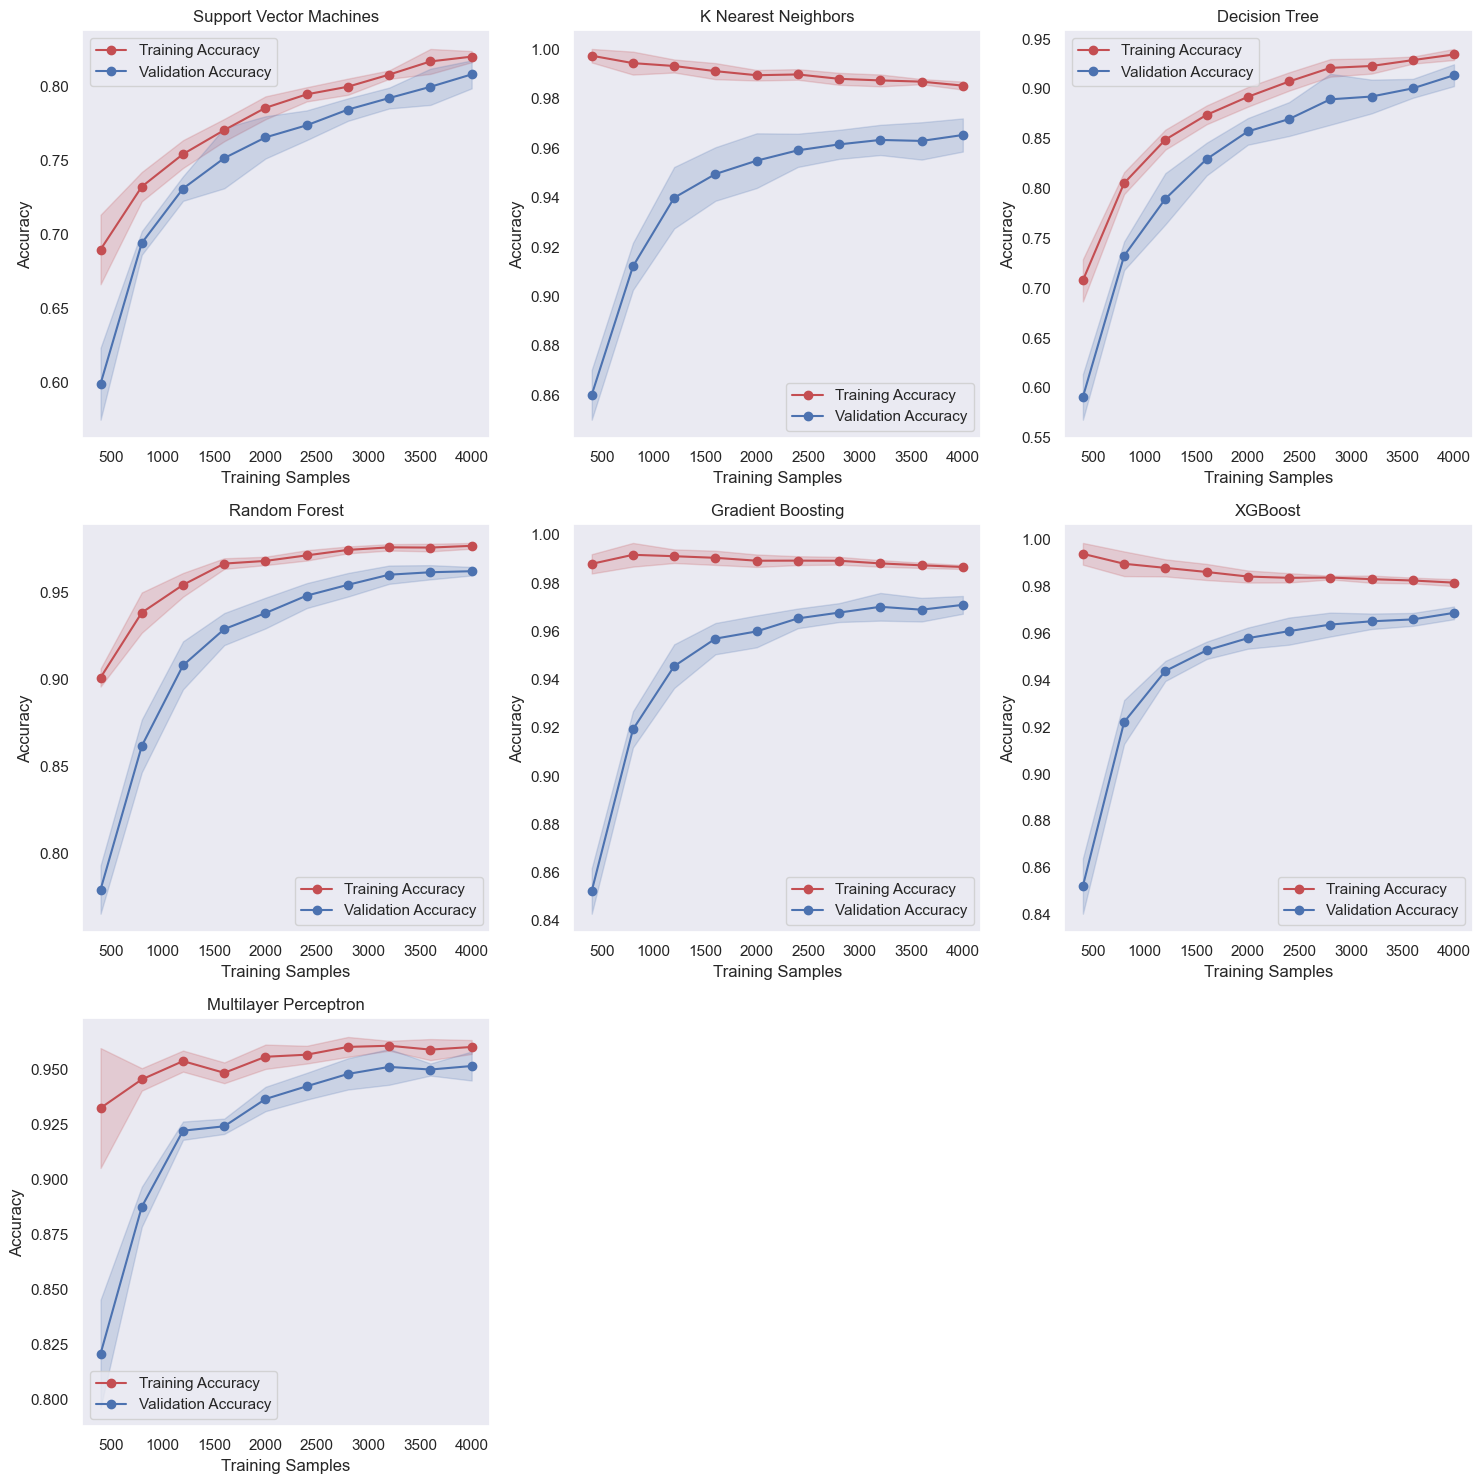

In [13]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
warnings.filterwarnings('ignore')

X2 = X[fea_knn]

models_fknn = {
    'Support Vector Machines': SVC(C = 1, gamma = 1, kernel = 'rbf'),
    'K Nearest Neighbors': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'distance'),

    'Decision Tree': DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, min_samples_leaf= 10,
                                            min_samples_split= 10, splitter='best'),
    
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 41, min_samples_leaf= 5, 
                                            min_samples_split= 10, n_estimators= 100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, 
                                                    min_samples_leaf= 15, min_samples_split=20, 
                                                    n_estimators= 50, subsample = 0.8),
    'XGBoost': XGBClassifier(colsample_bytree=0.8, gamma= 0.1, learning_rate=0.1, max_depth=5, 
                             min_child_weight= 1, subsample = 1.0),
    'Multilayer Perceptron': MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.1, hidden_layer_sizes= (50, 50), 
                                           learning_rate ='adaptive', learning_rate_init = 0.1, solver='sgd')
}

# Function to plot learning curves for a given model
def plot_learning_curve(model, model_name, subplot_position):
    plt.subplot(3, 3, subplot_position)
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X2, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2, color='r')

    plt.plot(train_sizes, val_mean, 'o-', color='b', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.2, color='b')

    plt.title(model_name)
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()

plt.figure(figsize=(15, 15))
position = 1

# Plot learning curves for each model
for model_name, model in models_fknn.items():
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(model, model_name, position)
    position += 1
plt.tight_layout()
plt.show()

<font color=black size=3 > **3. Model_3 Features of fea_rf**<br/>

In [14]:
X_test3 = X_test[fea_rf]
X_train3 = X_train[fea_rf]

<font color=black size=3 > **1) Hyperparameter Tuning**<br/>

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
warnings.filterwarnings('ignore')

# Define the models
models = {
    'Support Vector Machines': SVC(),
    'K Nearest Neighbors': KNeighborsClassifier(),
#     'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Multilayer Perceptron': MLPClassifier()
}

# Define the parameter grids for hyperparameter tuning
param_grids = {
    'Decision Tree': {'criterion': ['entropy'], 'splitter': ['best'],
                      'max_depth': list(range(1, 50, 5)),
                      'min_samples_split': [10,  50, 100, 180],
                      'min_samples_leaf': [10, 20, 30]},
    
    'K Nearest Neighbors': {'n_neighbors': list(range(1, 80)), 'weights': ['distance'],
                            'metric': ['manhattan']},
    
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                          'min_samples_split': [10, 20, 30], 'min_samples_leaf': [5, 10, 15],
                          'subsample': [0.8, 1.0]},
    
    'Random Forest': {'n_estimators': [100, 300, 500, 700], 'criterion': ['entropy'],
                      'max_depth': list(range(1, 50, 5)), 'min_samples_split': [10, 20, 30],
                      'min_samples_leaf': [5, 10, 15]},
    
    'Support Vector Machines': {'C': [0.1, 1], 'kernel': ['linear', 'poly','rbf'],
                                'gamma': [0.1, 1], 'degree': [2, 3]},

#     'Logistic Regression': {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20),
#                             'solver': ['saga'], 'max_iter': [2500]},

    'XGBoost': {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 1, 1.5, 2]},
    
    'Multilayer Perceptron': {'hidden_layer_sizes': [(100,), (50, 50)], 'activation':['identity', 'logistic', 'tanh','relu'],
                              'solver': ['sgd'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                              'alpha': [0.1, 1, 0.001], 'learning_rate_init': [0.001, 0.01]}
}


results_frf = pd.DataFrame(columns=['Model', 'Best Parameters', 'Cross-validated Accuracy'])
for model_name, model in models.items():
    
    print(f"Model: {model_name}")
    param_grid = param_grids[model_name]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train3, y_train)

    # Store the best hyperparameters and cross-validated accuracy in the results DataFrame
    results_frf = results_frf.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Cross-validated Accuracy': grid_search.best_score_
    }, ignore_index=True)


    print("Best Hyperparameters:", grid_search.best_params_)
    print("Cross-validated Accuracy:", grid_search.best_score_)
    print()

Model: Support Vector Machines
Best Hyperparameters: {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Cross-validated Accuracy: 0.87225

Model: K Nearest Neighbors
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Cross-validated Accuracy: 0.923

Model: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 41, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
Cross-validated Accuracy: 0.88825

Model: Random Forest
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
Cross-validated Accuracy: 0.9695

Model: Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Cross-validated Accuracy: 0.98275

Model: XGBoost
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_w

In [14]:
results_frf

,Model,Best Parameters,Cross-validated Accuracy
0,Support Vector Machines,"{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'p...",0.87225
1,K Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.92300
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 16, 'min...",0.88800
3,Random Forest,"{'criterion': 'entropy', 'max_depth': 31, 'min...",0.97025
4,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.98300
5,XGBoost,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.98100
6,Multilayer Perceptron,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.88650


<font color=black size=3 > **2) Model Evaluation**<br/>

In [16]:
from sklearn.model_selection import ShuffleSplit
warnings.filterwarnings('ignore')

models_frf = {
    'Support Vector Machines': SVC(C = 1, degree=3, gamma = 1, kernel = 'poly'),
    'K Nearest Neighbors': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance'),

    'Decision Tree': DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, min_samples_leaf= 10,
                                            min_samples_split= 10, splitter='best'),
    
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 31, min_samples_leaf= 5, 
                                            min_samples_split= 10, n_estimators= 500),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, 
                                                    min_samples_leaf= 15, min_samples_split=20, 
                                                    n_estimators= 200, subsample = 0.8),
    'XGBoost': XGBClassifier(colsample_bytree=0.8, gamma= 0.1, learning_rate=0.1, max_depth=7, 
                             min_child_weight= 1, subsample = 0.8),
    'Multilayer Perceptron': MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.01, hidden_layer_sizes= (50, 50), 
                                           learning_rate ='adaptive', learning_rate_init = 0.01, solver='sgd')
}

results_model3 = {}


for model_name, model in models_frf.items():
    model.fit(X_train3, y_train)
    
    # Cross-validated training accuracy
    training_accuracy = cross_val_score(model, X_train3, y_train, cv=5)
    results_model3[model_name] = {
        'min_score': np.min(training_accuracy),
        'max_score': np.max(training_accuracy),
        'mean_score': np.mean(training_accuracy),
        'std_dev': np.std(training_accuracy)
    }
    
    # Test accuracy
    test_accuracy = model.score(X_test3, y_test)
    results_model3[model_name]['test_accuracy'] = test_accuracy

# Print the results
print("Model\t\t\tTraining Accuracy\tTest Accuracy")
print("-------------------------------------------------")

for model_name, scores in results_model3.items():
    print(f"{model_name:<24}{scores['mean_score']:.4f} ± {scores['std_dev']:.4f}\t{scores['test_accuracy']:.4f}")


Model			Training Accuracy	Test Accuracy
-------------------------------------------------
Support Vector Machines 0.8722 ± 0.0052	0.8610
K Nearest Neighbors     0.9230 ± 0.0063	0.9230
Decision Tree           0.8882 ± 0.0076	0.9070
Random Forest           0.9667 ± 0.0058	0.9720
Gradient Boosting       0.9828 ± 0.0033	0.9910
XGBoost                 0.9810 ± 0.0022	0.9830
Multilayer Perceptron   0.9267 ± 0.0082	0.9330


In [77]:
results_model3= pd.DataFrame(results_model3).transpose()
results_model3

,min_score,max_score,mean_score,std_dev,test_accuracy
Support Vector Machines,0.86500,0.87875,0.87225,0.005208,0.861
K Nearest Neighbors,0.91500,0.93250,0.92300,0.006255,0.923
Decision Tree,0.87750,0.90125,0.88775,0.007640,0.907
Random Forest,0.95875,0.97750,0.96875,0.006225,0.973
Gradient Boosting,0.97750,0.98625,0.98175,0.002915,0.989
XGBoost,0.97875,0.98500,0.98100,0.002151,0.983
Multilayer Perceptron,0.92125,0.93250,0.92625,0.003953,0.925


In [78]:
results_model3.to_csv('0721results_frf.csv', index=True)

<font color=black size=3 > **3) Check Learning Curve**<br/>

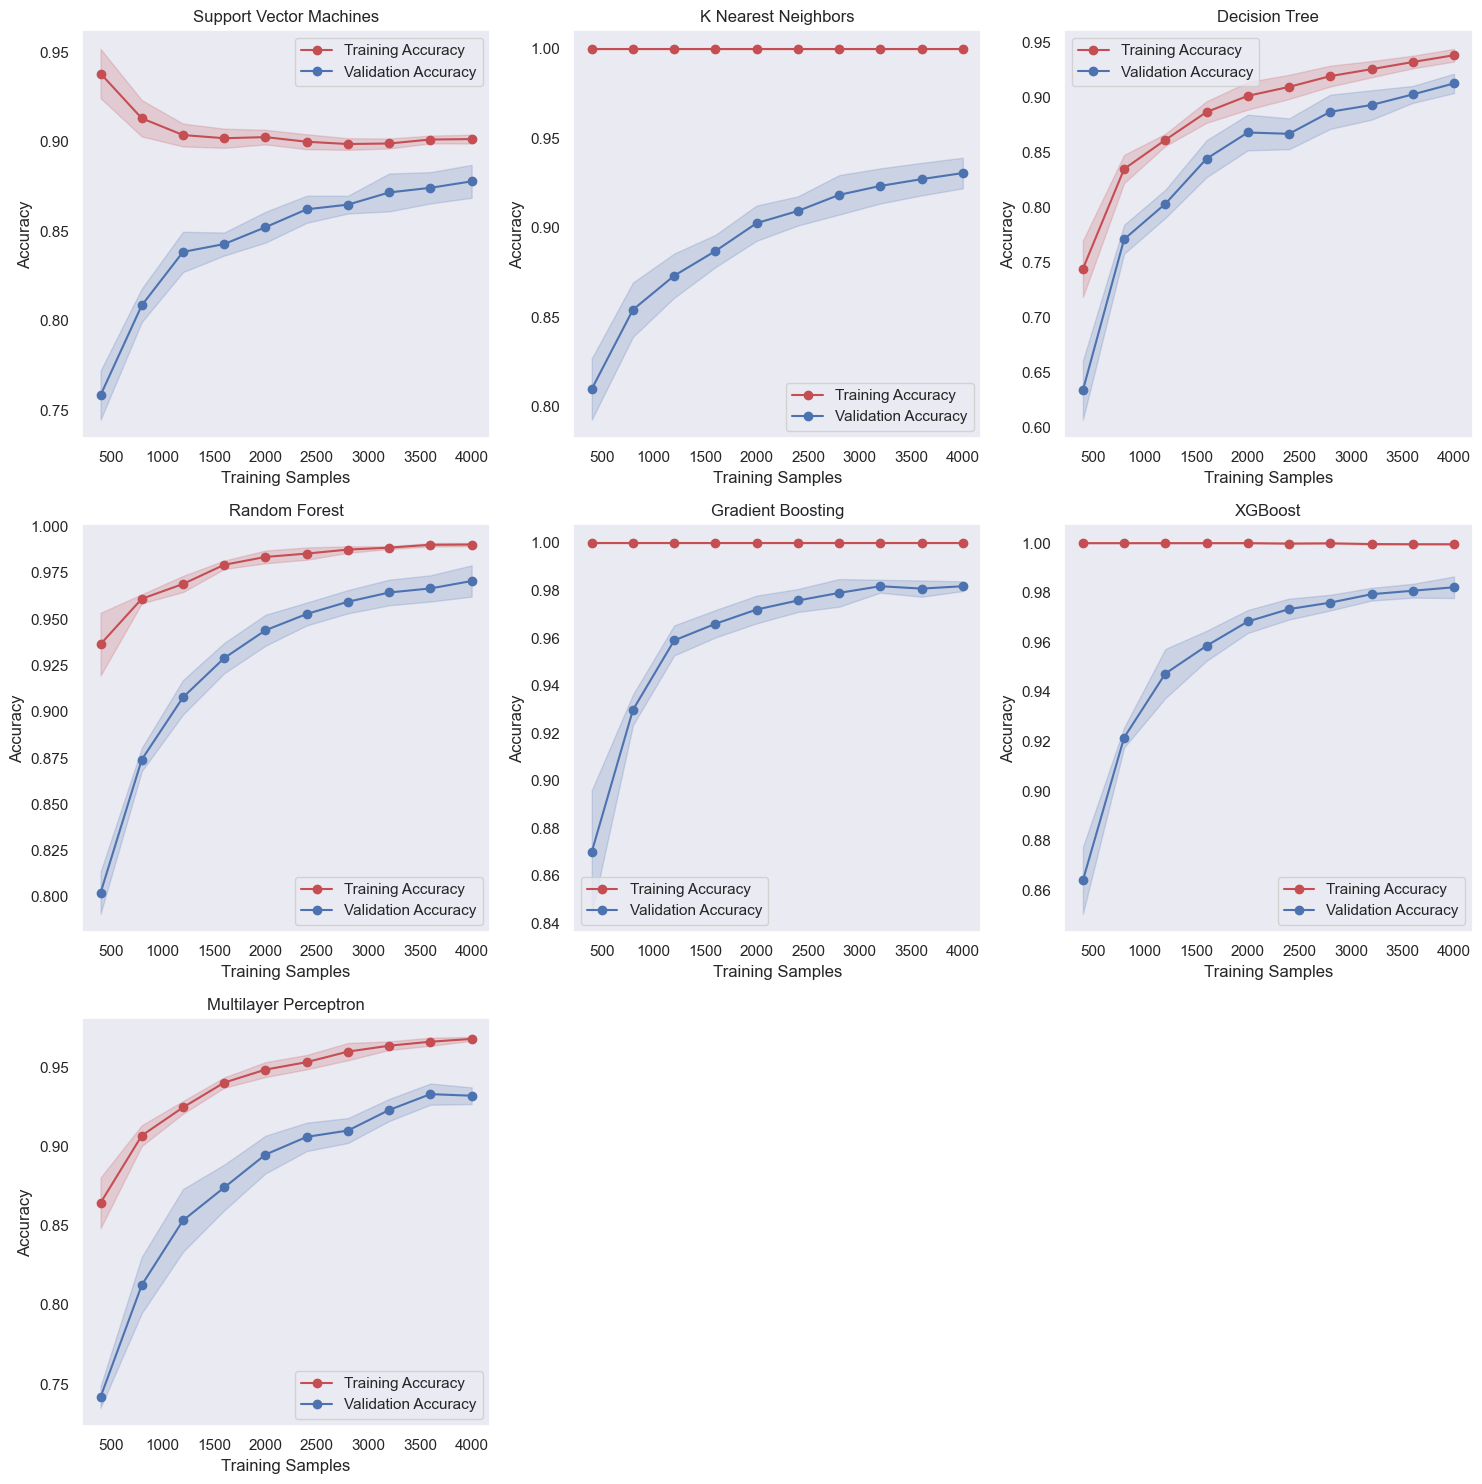

In [17]:
from sklearn.model_selection import learning_curve
warnings.filterwarnings('ignore')

X3 = X[fea_rf]

models_frf = {
    'Support Vector Machines': SVC(C = 1, degree=3, gamma = 1, kernel = 'poly'),
    'K Nearest Neighbors': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance'),

    'Decision Tree': DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, min_samples_leaf= 10,
                                            min_samples_split= 10, splitter='best'),
    
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 31, min_samples_leaf= 5, 
                                            min_samples_split= 10, n_estimators= 500),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, 
                                                    min_samples_leaf= 15, min_samples_split=20, 
                                                    n_estimators= 200, subsample = 0.8),
    'XGBoost': XGBClassifier(colsample_bytree=0.8, gamma= 0.1, learning_rate=0.1, max_depth=7, 
                             min_child_weight= 1, subsample = 0.8),
    'Multilayer Perceptron': MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.01, hidden_layer_sizes= (50, 50), 
                                           learning_rate ='adaptive', learning_rate_init = 0.01, solver='sgd')
}

# Function to plot learning curves for a given model
def plot_learning_curve(model, model_name, subplot_position):
    plt.subplot(3, 3, subplot_position)
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X3, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2, color='r')

    plt.plot(train_sizes, val_mean, 'o-', color='b', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.2, color='b')

    plt.title(model_name)
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()

plt.figure(figsize=(15, 15))
position = 1

# Plot learning curves for each model
for model_name, model in models_frf.items():
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(model, model_name, position)
    position += 1
plt.tight_layout()
plt.show()

<font color=black size=3 > **4. Compare Models**<br/>

In [81]:
re = pd.read_csv("0721results.csv")
re

,Model,Feature_set,min_score,max_score,mean_score,std_dev,test_accuracy
0,Support Vector Machines,knn,0.79000,0.81875,0.80500,0.009937,0.805
1,K Nearest Neighbors,knn,0.95750,0.97250,0.96600,0.005087,0.967
2,Decision Tree,knn,0.89000,0.91625,0.89925,0.009441,0.910
3,Random Forest,knn,0.96000,0.97500,0.96500,0.005420,0.963
4,Gradient Boosting,knn,0.96500,0.97375,0.97000,0.002850,0.974
5,XGBoost,knn,0.96625,0.97500,0.97000,0.004108,0.969
6,Multilayer Perceptron,knn,0.94625,0.96250,0.95450,0.005511,0.961
7,Support Vector Machines,temp,0.60000,0.63125,0.60850,0.011974,0.644
8,K Nearest Neighbors,temp,0.90750,0.93125,0.92275,0.008344,0.920
9,Decision Tree,temp,0.86750,0.89375,0.87750,0.008732,0.898


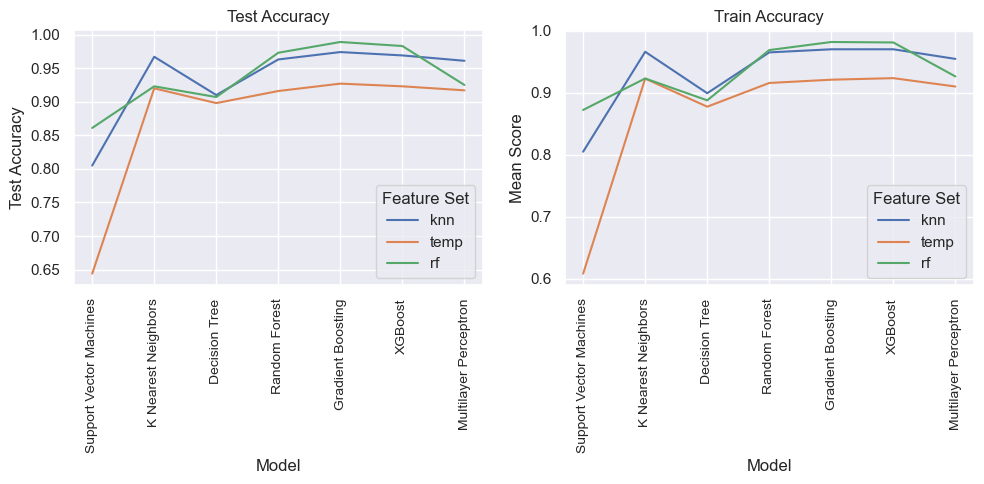

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# First subplot: test_accuracy vs. Model
sns.lineplot(data=re, x="Model", y="test_accuracy", hue="Feature_set", ax=axes[0])
axes[0].set_ylabel('Test Accuracy')
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].legend(title="Feature Set")
axes[0].set_title('Test Accuracy')

# Second subplot: mean_score vs. Model
sns.lineplot(data=re, x="Model", y="mean_score", hue="Feature_set", ax=axes[1])
axes[1].set_ylabel('Mean Score')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].legend(title="Feature Set")
axes[1].set_title('Train Accuracy')

plt.tight_layout()
plt.show()

<font color=black size=4 > **5.4 Build Final Model with fea_knn**<br/>
    
<font color=black size=3 > **1. Random Forest**<br/>

In [197]:
X_test2 = X_test[fea_knn]
X_train2 = X_train[fea_knn]

In [215]:
X_train2

,heart rate,h_temp,a_temp
976,-0.8926,1.07400,0.4970
4567,-1.4940,0.85550,0.2185
1388,-0.4922,0.04462,-0.2834
431,-0.9260,0.85550,0.8315
2251,0.5430,0.29420,0.9440
...,...,...,...
1452,-0.1583,0.82400,0.3857
1813,1.6780,0.38800,0.2185
3902,0.9100,-0.39230,0.2742
366,-0.2585,0.76200,0.7200


In [198]:
rf = RandomForestClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 5, 
                                            min_samples_split= 8, n_estimators= 50, random_state=42)

rf.fit(X_train2, y_train)
y_pred_rf = rf.predict(X_test2)
report_rf = classification_report(y_test, y_pred_rf)

cross_train_accuracy = np.mean(cross_val_score(rf, X_train2, y_train, cv=5))
test_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Test Accuracy: {test_accuracy}")
print(f"Cross Train Accuracy: {cross_train_accuracy}")
print(report_rf)


Test Accuracy: 0.962
Cross Train Accuracy: 0.96175
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           1       1.00      0.95      0.98        84
           2       0.96      1.00      0.98        88
           3       0.98      0.98      0.98        82
           4       0.88      0.99      0.93        79
           5       0.98      0.91      0.94        88
           6       0.98      0.99      0.98        84
           7       0.95      0.93      0.94        81
           8       0.95      0.99      0.97        78
           9       1.00      0.97      0.98        86
          10       0.97      1.00      0.98        86
          11       0.95      0.87      0.91        86

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



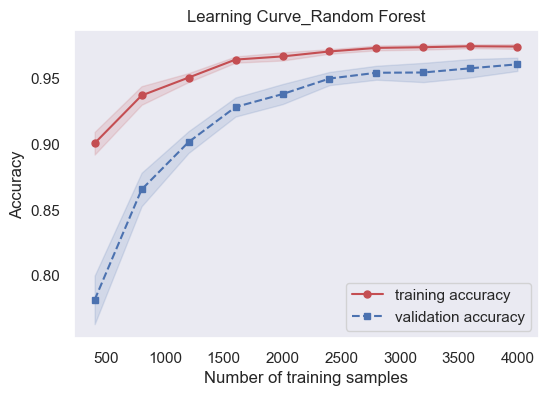

In [199]:
from sklearn.model_selection import learning_curve
X2 = X[fea_knn]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator=rf, X=X2, y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, n_jobs=1)
train_mean_rf = np.mean(train_scores, axis=1)
train_std_rf = np.std(train_scores, axis=1)
test_mean_rf = np.mean(test_scores, axis=1)
test_std_rf = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean_rf, color='r', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_rf + train_std_rf, train_mean_rf - train_std_rf, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean_rf, color='b', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_rf + test_std_rf, test_mean_rf - test_std_rf, alpha=0.15, color='b')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Random Forest')
plt.legend(loc='lower right')
plt.show()

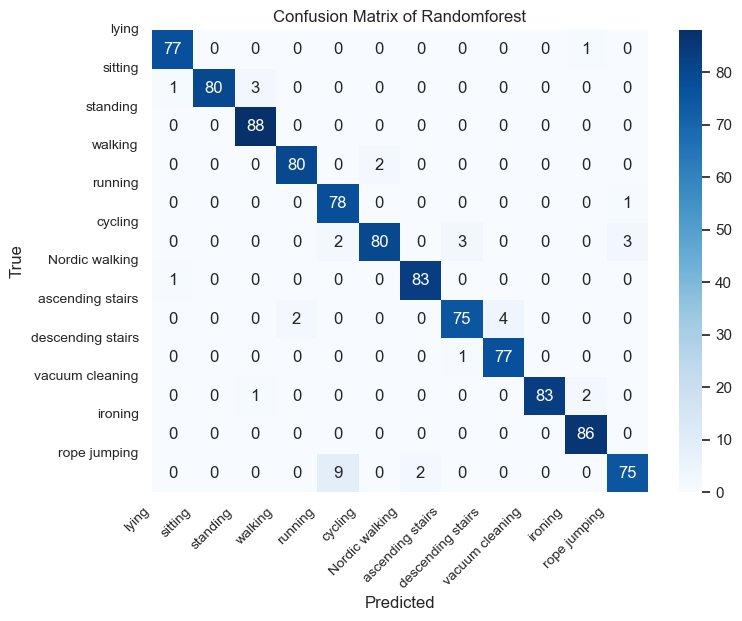

In [200]:
cm_rf= confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Randomforest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 > **2. Gradient Boosting**<br/>

In [185]:
gb = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 5, n_estimators=50,
                                min_samples_leaf= 8, min_samples_split=20, random_state=0)
gb.fit(X_train2, y_train)
y_pred_gb = gb.predict(X_test2)
report_gb = classification_report(y_test, y_pred_gb)

cross_train_accuracy = np.mean(cross_val_score(gb, X_train2, y_train, cv=5))
test_accuracy = accuracy_score(y_test, y_pred_gb)

print(f"Test Accuracy: {test_accuracy}")
print(f"Cross Train Accuracy: {cross_train_accuracy}")
print(report_gb)

Test Accuracy: 0.965
Cross Train Accuracy: 0.9649999999999999
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.96      0.95      0.96        84
           2       0.95      0.98      0.96        88
           3       0.96      0.99      0.98        82
           4       0.89      0.97      0.93        79
           5       0.95      0.93      0.94        88
           6       1.00      1.00      1.00        84
           7       0.95      0.94      0.94        81
           8       0.97      0.99      0.98        78
           9       1.00      0.97      0.98        86
          10       0.98      0.99      0.98        86
          11       0.99      0.90      0.94        86

    accuracy                           0.96      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.96      0.97      1000



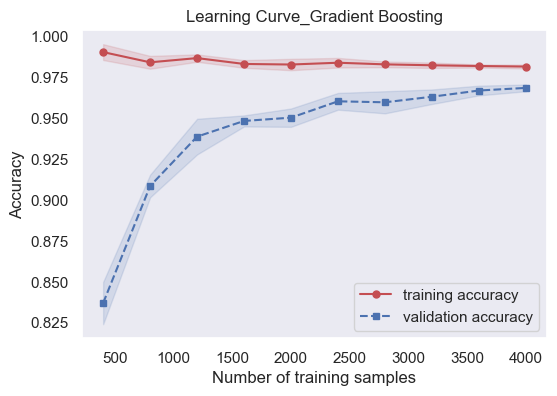

In [184]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
gb = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 5, n_estimators=50,
                                min_samples_leaf= 8, min_samples_split=20, random_state=0)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator=gb, X=X2, y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, n_jobs=1)
train_mean_gb = np.mean(train_scores, axis=1)
train_std_gb = np.std(train_scores, axis=1)
test_mean_gb = np.mean(test_scores, axis=1)
test_std_gb = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean_gb, color='r', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_gb + train_std_gb, train_mean_gb - train_std_gb, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean_gb, color='b', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_gb + test_std_gb, test_mean_gb - test_std_gb, alpha=0.15, color='b')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

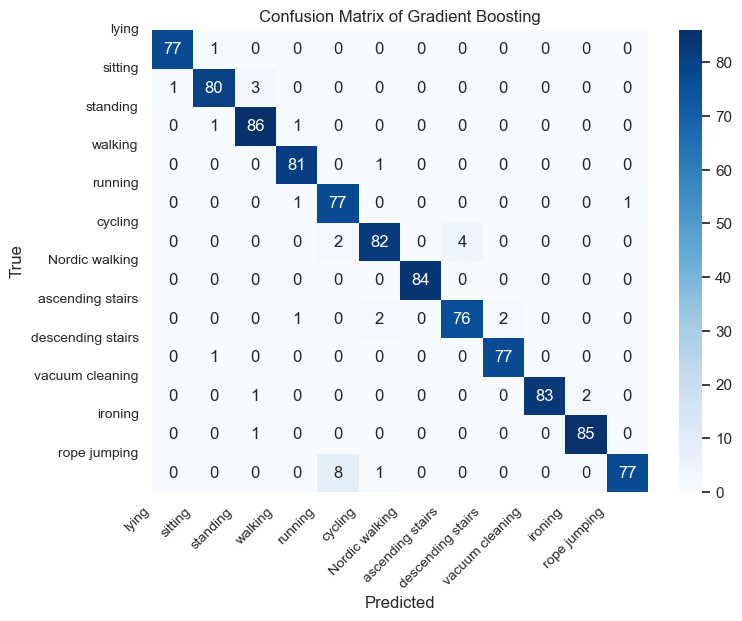

In [201]:
cm_gb= confusion_matrix(y_test,y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 > **3. Multilayer Perceptron**<br/>

In [195]:
mlp = MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.1, 
                    hidden_layer_sizes= (80, 50, 25), random_state=0, solver='sgd',
                    learning_rate ='constant',learning_rate_init=0.01)

mlp.fit(X_train2, y_train)
y_pred_mlp = mlp.predict(X_test2)
report_mlp = classification_report(y_test, y_pred_mlp)

cross_train_accuracy = np.mean(cross_val_score(mlp, X_train2, y_train, cv=5))
test_accuracy = accuracy_score(y_test, y_pred_mlp)

print(f"Test Accuracy: {test_accuracy}")
print(f"Cross Train Accuracy: {cross_train_accuracy}")
print(report_mlp)

Test Accuracy: 0.941
Cross Train Accuracy: 0.9344999999999999
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.96      0.98      0.97        84
           2       0.97      0.98      0.97        88
           3       0.96      0.95      0.96        82
           4       0.82      0.95      0.88        79
           5       0.93      0.94      0.94        88
           6       0.97      1.00      0.98        84
           7       0.88      0.83      0.85        81
           8       0.86      0.88      0.87        78
           9       1.00      0.97      0.98        86
          10       0.96      1.00      0.98        86
          11       1.00      0.85      0.92        86

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



<font color=black size=3 > **3) Check Learning Curve**<br/>

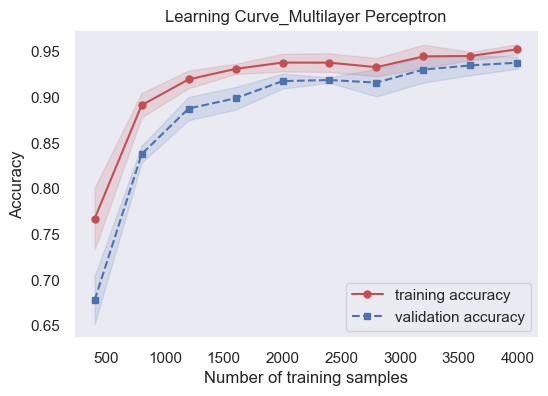

In [216]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

warnings.filterwarnings('ignore')

X2 = X[fea_knn]
mlp = MLPClassifier(activation= 'relu', max_iter=500, alpha=  0.1, 
                    hidden_layer_sizes= (80, 50, 25), random_state=0, solver='sgd',
                    learning_rate ='constant',learning_rate_init=0.01)


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X2, y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, n_jobs=1)
train_mean_mlp = np.mean(train_scores, axis=1)
train_std_mlp = np.std(train_scores, axis=1)
test_mean_mlp = np.mean(test_scores, axis=1)
test_std_mlp = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean_mlp, color='r', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_mlp + train_std_mlp, train_mean_mlp - train_std_mlp, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean_mlp, color='b', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_mlp + test_std_mlp, test_mean_mlp - test_std_mlp, alpha=0.15, color='b')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Multilayer Perceptron')
plt.legend(loc='lower right')
plt.show()

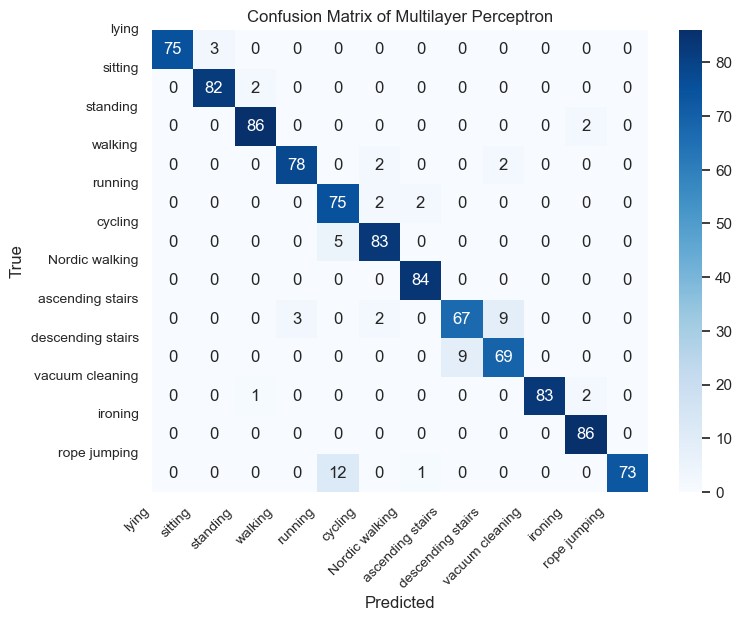

In [202]:
cm_mlp= confusion_matrix(y_test,y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Multilayer Perceptron')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 > **4 Final Results**<br/>

In [203]:
models_final = {
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 5, 
                                            min_samples_split= 8, n_estimators= 50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.05, max_depth= 5, n_estimators=50,
                                min_samples_leaf= 8, min_samples_split=20, random_state=0),
    
    'Multilayer Perceptron':MLPClassifier(activation= 'relu', max_iter=500, alpha= 0.1, 
                    hidden_layer_sizes= (80, 50, 25), random_state=0, solver='sgd',
                    learning_rate ='constant',learning_rate_init=0.01)}

results_final = {}


for model_name, model in models_final.items():
    model.fit(X_train2, y_train)
    
    # Cross-validated training accuracy
    training_accuracy = cross_val_score(model, X_train2, y_train, cv=5)
    results_final[model_name] = {
        'min_score': np.min(training_accuracy),
        'max_score': np.max(training_accuracy),
        'mean_score': np.mean(training_accuracy),
        'std_dev': np.std(training_accuracy)
    }
    
    # Test accuracy
    test_accuracy = model.score(X_test2, y_test)
    results_final[model_name]['test_accuracy'] = test_accuracy

# Print the results
print("Model\t\t\tTraining Accuracy\tTest Accuracy")
print("-------------------------------------------------")

for model_name, scores in results_final.items():
    print(f"{model_name:<24}{scores['mean_score']:.4f} ± {scores['std_dev']:.4f}\t{scores['test_accuracy']:.4f}")


Model			Training Accuracy	Test Accuracy
-------------------------------------------------
Random Forest           0.9617 ± 0.0066	0.9620
Gradient Boosting       0.9650 ± 0.0065	0.9650
Multilayer Perceptron   0.9345 ± 0.0111	0.9410


In [204]:
results_final = pd.DataFrame(results_final).transpose()
results_final

,min_score,max_score,mean_score,std_dev,test_accuracy
Random Forest,0.95500,0.97375,0.96175,0.006643,0.962
Gradient Boosting,0.95625,0.97375,0.96500,0.006519,0.965
Multilayer Perceptron,0.91375,0.94500,0.93450,0.011085,0.941


In [205]:
results_final.to_csv('0721results_final.csv', index=True)

<font color=black size=3 > **3) Check Learning Curve**<br/>

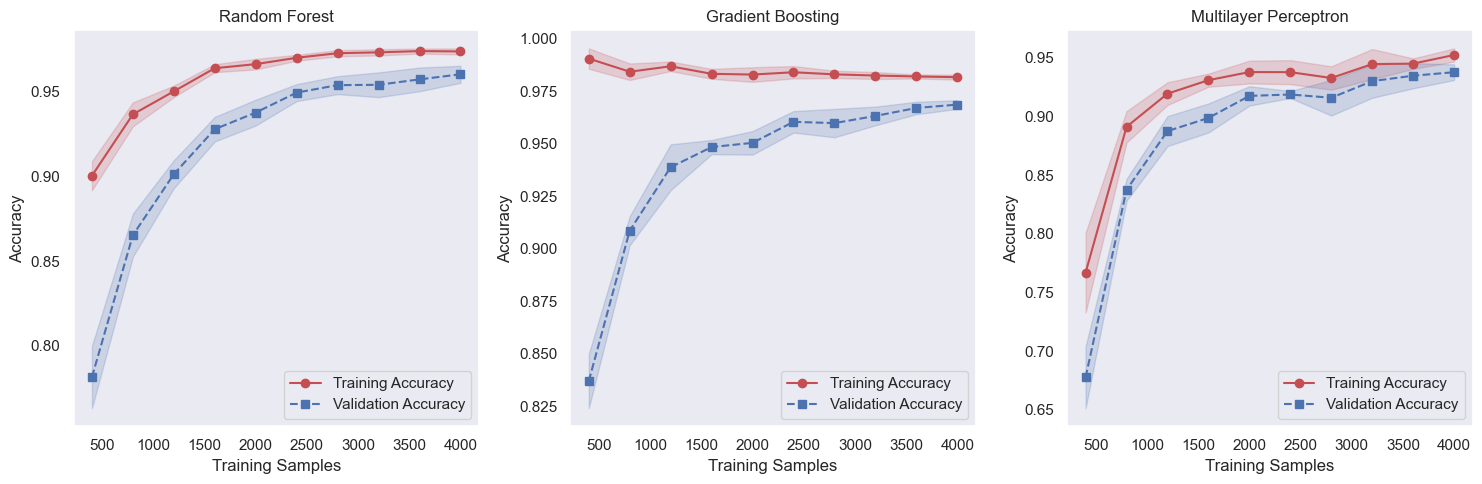

In [218]:
from sklearn.model_selection import learning_curve
warnings.filterwarnings('ignore')
X2 = X[fea_knn]

models_final = {
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 5, 
                                            min_samples_split= 8, n_estimators= 50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.05, max_depth= 5, n_estimators=50,
                                min_samples_leaf= 8, min_samples_split=20, random_state=0),
    
    'Multilayer Perceptron':MLPClassifier(activation='relu', max_iter=500, alpha= 0.1, 
                    hidden_layer_sizes= (80, 50, 25), random_state=0, solver='sgd',
                    learning_rate ='constant',learning_rate_init=0.01)
}

# Function to plot learning curves for a given model
def plot_learning_curve(model, model_name, subplot_position):
    plt.subplot(1, 3, subplot_position)
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X2, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2, color='r')

    plt.plot(train_sizes, val_mean, linestyle='--', marker='s', color='b', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.2, color='b')

    plt.title(model_name)
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()

plt.figure(figsize=(15, 5))
position = 1

# Plot learning curves for each model
for model_name, model in models_final.items():
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(model, model_name, position)
    position += 1
plt.tight_layout()
plt.show()


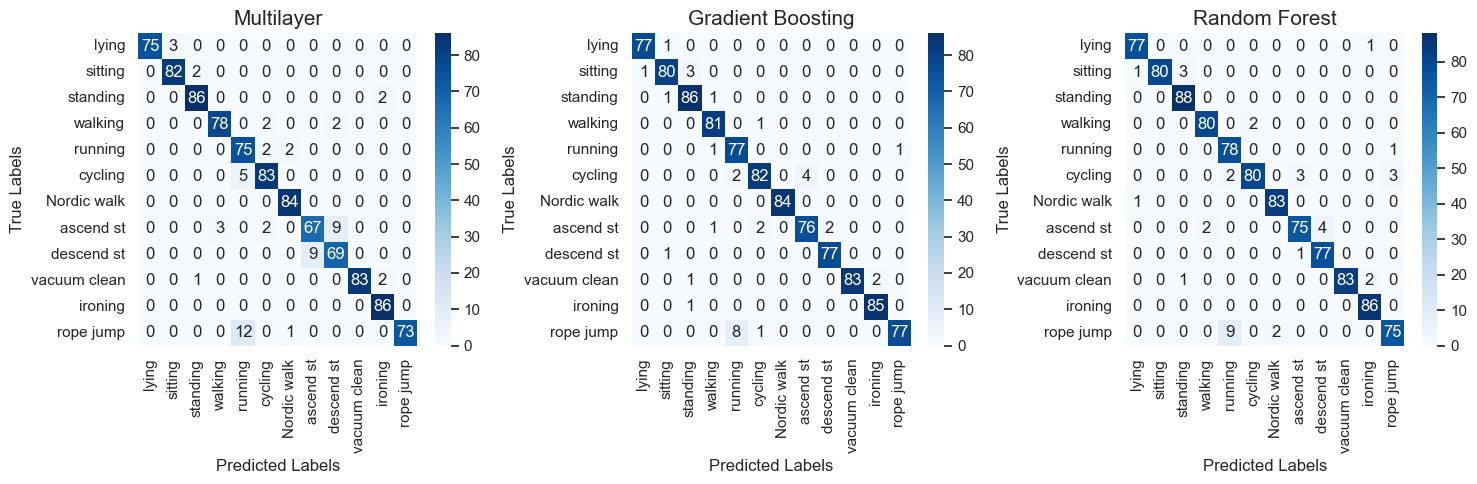

In [212]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


titles = ["Multilayer", "Gradient Boosting", "Random Forest"]


for i, cm in enumerate([cm_mlp, cm_gb, cm_rf]):
    labels = ['lying', 'sitting','standing',  'walking', 'running', 'cycling',
                           'Nordic walk', 'ascend st','descend st',   
                           'vacuum clean', 'ironing', 'rope jump' ]
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], xticklabels=labels, yticklabels=labels)
    axes[i].set_title(titles[i],fontsize=15)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()
